<a href="https://colab.research.google.com/github/rakshit003/python/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dear data enthusiast,

We're happy that you have reached to this notebook. We expect you to spend 3-4 hours for solving these problems. This is a shared notebook so please keep in mind that you have to **Crtl+S** save your code. Hope you will enjoy finding interesting facts in the data.
  
Good luck!



In [ ]:
# please write down your first and last name on the following line
# Name Surname
# Rakshit Chauhan

# 0- Quiz setup
Execute the below 2 cells of code before starting the quiz.

### 0-1 Install Dependencies
This installation will take around 2 minutes, after you see the following error message, you can continue run the next cell `0-2 Initiate the Quiz`.   
<img src='https://drive.google.com/uc?id=1T61Fx1xfKoh2ODuJ5t76e1N7lrqlTRwy' alt="Your session crashed for an unknown reason. " width="400" >. 
  
**NOTE**: Intentionally crashing session to use the newly installed library.

In [ ]:
#@title
from packaging import version
import sqlite3

if version.parse(sqlite3.sqlite_version) < version.parse('3.33.0'):
  print('NOTE: Intentionally crashing session to use the newly installed library.\n')
  !curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
  %cd sqlite/
  !./configure
  !make sqlite3.c
  %cd /content
  !npx degit coleifer/pysqlite3 -f
  !cp sqlite/sqlite3.[ch] .
  !python setup.py build_static build
  !cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
    /usr/lib/python3.7/lib-dynload/

  import os
  os._exit(0)

NOTE: Intentionally crashing session to use the newly installed library.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  9882k      0  0:00:01  0:00:01 --:--:-- 9882k
/content/sqlite
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking fo

### 0-2 Initiate the Quiz

In [ ]:
#@title
from packaging import version
import sqlite3

from datetime import datetime
import numpy as np
import pandas as pd
from sqlalchemy import (
    create_engine,
    Column, DateTime, Integer, Numeric, String, Sequence, NVARCHAR
)
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import orm 

Base = declarative_base()
N_ORDER = 300
START_DATE = '2018-03-01'
END_DATE = '2018-03-31'
N_OFFER = 10


class Order(Base):
  __tablename__ = 'orders'
  order_id = Column(Integer, Sequence('order_id_seq'), primary_key=True)
  article_id = Column(Numeric())
  customer_id = Column(Numeric())
  order_time = Column(DateTime())
  order_quantity = Column(Numeric())


class Offer(Base):
  __tablename__ = 'offers'
  offer_id = Column(Integer, Sequence('offer_id_seq'), primary_key=True)
  supplier_id = Column(Numeric())
  available_stock_quantity = Column(Numeric())
  material_type = Column(NVARCHAR())
  material_price_eur = Column(Numeric())


class Quiz():
  def __init__(self):
    self.engine = create_engine('sqlite:///:memory:', echo=False)
    self.conn = self.engine.connect()
    Session = orm.sessionmaker(bind=self.engine)
    self.session = Session()
    self.__insert_data_to_db()    

  def get_results(self, query):
    query = query.statement if isinstance(query, orm.query.Query) else query
    return pd.read_sql(query, self.conn)

  def __insert_data_to_db(self):
    Base.metadata.create_all(self.engine)

    data = self._generate_order_dateset()
    for idx, row in data.iterrows():
      obj = Order(
        article_id=row['article_id'],
        customer_id=row['customer_id'],
        order_time=row['order_time'],
        order_quantity=row['order_quantity'],
      )
      self.session.add(obj)
      self.session.commit()

    data = self._generate_offer_dataset()
    for idx, row in data.iterrows():
      obj = Offer(
        supplier_id=row['supplier_id'],
        available_stock_quantity=row['available_stock_quantity'],
        material_type=row['material_type'],
        material_price_eur=row['material_price_eur'],
      )
      self.session.add(obj)
      self.session.commit()  

  @staticmethod
  def _generate_order_dateset(
    data_size=N_ORDER,
    start_date=START_DATE,
    end_date=END_DATE,
  ):
    np.random.seed(seed=2)
    article_id = np.random.randint(111, 116, data_size)

    np.random.seed(seed=0)
    customer_id = np.random.randint(1222, 1330, data_size)
    
    def _random_dates(start, end, n=10):
      np.random.seed(seed=0)
      start = pd.to_datetime(start)
      end = pd.to_datetime(end)
      start_u = start.value//10**9
      end_u = end.value//10**9
      return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')
    order_time = _random_dates(start_date, end_date, data_size)
    order_time = sorted(order_time)

    np.random.seed(seed=0)
    order_quantity = np.random.randint(1,4, data_size)

    data = pd.DataFrame({
      'article_id': article_id, 
      'customer_id': customer_id,
      'order_time': order_time,
      'order_quantity': order_quantity,
    })

    return data
  
  @staticmethod
  def _generate_offer_dataset(n=N_OFFER):
    supplier_id = np.linspace(1, n, num=n)
    available_stock_quantity = np.repeat(1, n)
    material_type = [
      'ceramic','ceramic','ceramic','ceramic','wood','ceramic','wood','wood',
      'wood','wood'
    ]
    material_price_eur = [
      1000, 1500, 2500, 5000, 6000, 7000, 8000, 11000, 12000, 15000
    ]
    
    data = pd.DataFrame({
      'supplier_id': supplier_id, 
      'available_stock_quantity':available_stock_quantity,
      'material_type': material_type,
      'material_price_eur': material_price_eur,
    })

    return data


if version.parse(sqlite3.sqlite_version) < version.parse('3.33.0'):
  print('sqlite3 is not updated, try to update or contact us.')
else: 
  quiz = Quiz()

# 1- SQL quiz
Write down your query to get the expected result.   
**Note**: If you have problem running the sql below, considere using *sqlite* syntax.

## 1-1 Best Performing Day(s) per Article


Table `orders` :  
The table shows the orders of the articles in an online store. Each row is a transaction of a customer order.
  
Column Name | Datatype 
--- | --- 
order_id | Integer (primary_key)
article_id | Numeric 
customer_id | Numeric 
order_time | DateTime
order_quantity | Numeric 

To understand when is the best time to sell the article, we want to create a report that shows the day that had the highest order amount for each article. Check the example for clarity.

Example from the `orders` table:  

In [ ]:
#@title
quiz.get_results(" select * from orders limit 5")

,order_id,article_id,customer_id,order_time,order_quantity
0,1,111,1266,2018-03-01 03:43:49.000000,1
1,2,111,1269,2018-03-01 05:45:37.000000,2
2,3,114,1286,2018-03-01 06:52:57.000000,1
3,4,113,1289,2018-03-01 10:55:35.000000,2
4,5,114,1289,2018-03-01 12:08:43.000000,2



Expacted result table:  
Your SQL query should return the following rows.

article_id | order_date | order_quantity
--- | ---  | ---
111 | 2018-03-05 | 8
111 | 2018-03-26 | 8
112 | 2018-03-11 | 10
113 | 2018-03-29 | 18
114 | 2018-03-29 | 14
115 | 2018-03-21 | 14

In [ ]:
# write the query to get your result
query = """
--select the top ranked quanity for each article
select 
  article_id,
  order_date,
  order_quantity
  from(
      --rank each article by their quantity in descending order
        select 
          article_id,
          order_date,
          total_quantity as order_quantity,
          rank() over(partition by article_id order by total_quantity desc) as rank
        from (
        --get total quantity at day level
              select 
                article_id,
                date(order_time) as order_date,
                sum(order_quantity) as total_quantity
              from orders
              group by article_id,date(order_time)
              )
      )
where rank=1
"""
quiz.get_results(query)

,article_id,order_date,order_quantity
0,111,2018-03-05,8
1,111,2018-03-26,8
2,112,2018-03-11,10
3,113,2018-03-29,18
4,114,2018-03-29,14
5,115,2018-03-21,14


## 1-2 Budget Allocation
Assume that you need to order wood and ceramic materials for your production 
and you had following offers from different suppliers.

Table `offers`

Column Name | Datatype 
--- | --- 
offer_id | Integer (primary_key)
supplier_id | Numeric 
available_stock_quantity | Numeric
material_type | NVARCHAR 
material_price_eur | Numeric 

Your strategy is first buy as much as wood with your budget and if there is still any available budget use it to buy as much as ceramic. Your budget is limited with 30.000 Euro. 

To make the things easier assume that this year **all suppliers can offer only 1 item as per listed in the table**, so you will not order more than 1 from 1 offer. Write an sql query and the result should show how would you distribute your budget. 

The full offers:


In [ ]:
#@title
quiz.get_results('select * from offers')

,offer_id,supplier_id,available_stock_quantity,material_type,material_price_eur
0,1,1,1,ceramic,1000
1,2,2,1,ceramic,1500
2,3,3,1,ceramic,2500
3,4,4,1,ceramic,5000
4,5,5,1,wood,6000
5,6,6,1,ceramic,7000
6,7,7,1,wood,8000
7,8,8,1,wood,11000
8,9,9,1,wood,12000
9,10,10,1,wood,15000


In this question, we showed you the result table would look the same as below

ordered_wood_quantity | ordered_ceramic_quantity | 
--- | --- 
3 | 3



In [ ]:
# write the query to get your result
query = """



--get cumulative sum of price for each material_type
--also calculate remaining sum after wood money consumption
  with Wood_Ceramic as
    (
    SELECT 
      offer_id , 
      material_type, 
      sum(available_stock_quantity*material_price_eur) OVER (partition by material_type ORDER BY material_price_eur) AS Cumulative_Price,
      case 
        when material_type='wood' then 30000-sum(available_stock_quantity*material_price_eur) OVER (partition by material_type ORDER BY material_price_eur)
        else Null  end  AS remaining_price
    FROM offers
    ),

--get max wood quantity one could by with 30k
  wood_quantity as
  (
  select 1 as key,count(*) as ordered_wood_quantity from Wood_Ceramic  where remaining_price>=0 and material_type='wood'
  ),

--get max ceramic quantity one could by with remaining amount
  ceramic_quantity as
  (
    select 
      1 as key,count(*) as ordered_ceramic_quantity 
    from Wood_Ceramic 
      where material_type='ceramic' and 
          Cumulative_Price<=(select min(remaining_price) from Wood_Ceramic where remaining_price>0 and material_type='wood')
  )

--result to display
  select ordered_wood_quantity,ordered_ceramic_quantity from
  wood_quantity inner join ceramic_quantity on wood_quantity.key=ceramic_quantity.key

"""
quiz.get_results(query)

,ordered_wood_quantity,ordered_ceramic_quantity
0,3,3


# 2 - Data exploration and analysis 
This dataset is a toy dataset, so the data is clean and just ready for you to express your ideas. Please use your visualization and statistics skill to demonstrate your thought process and reasoning. Tell us your conclusion from the data with clear statement. Now ready to explore the data and convince us.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']

print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 2-1 The dependency of the house price and the number of rooms
* How would you explain the dependencies of house price and number of rooms?
* Can you come up a hypothesis and test it?
* Is there some exceptions of the dependency you found? How would you explain it?

##Conclusions
*   Strong +ve correlation(~ +70%) observed between House Price and number of rooms, i.e House Price tends to go up as number of rooms increase  and it caps at $50k.
>This should be because house with more rooms are generally bigger in size and accommodate more people
**Hypothesis Test** 
> Null hypothesis(H₀): There is no relationship between  number of rooms and house price 

  > Alternative hypothesis(H₁): There is a relationship  between house price and number of rooms

>> Upon testing the p value with Pearson's Correlation test(shown in code), we can reject the above null hypothesis

*   **Exceptions**
> Even though House Price and Rooms are linearly correlated, we see some exceptions as below
>> 1. We see a few outliers for almost every room number category
>> 2. House Price does not  increase beyond $50k,hence the relationship has an upper bound

>>> Apart from #Rooms house Prices are also influenced by some other aspects like. Status of population living in the neighbourhood or Proximity of the house to city center etc. Some of th enomalies can be attributed to these considerations. for Eg. few house groups have very few rooms but are high price because the neighbourhood has high status people. And some houses are having very hight price despite average # rooms because they are high status and closer to city center where houses are generally smaller. Below graph(I built in qlik tool) gives good explaination on these anomalies





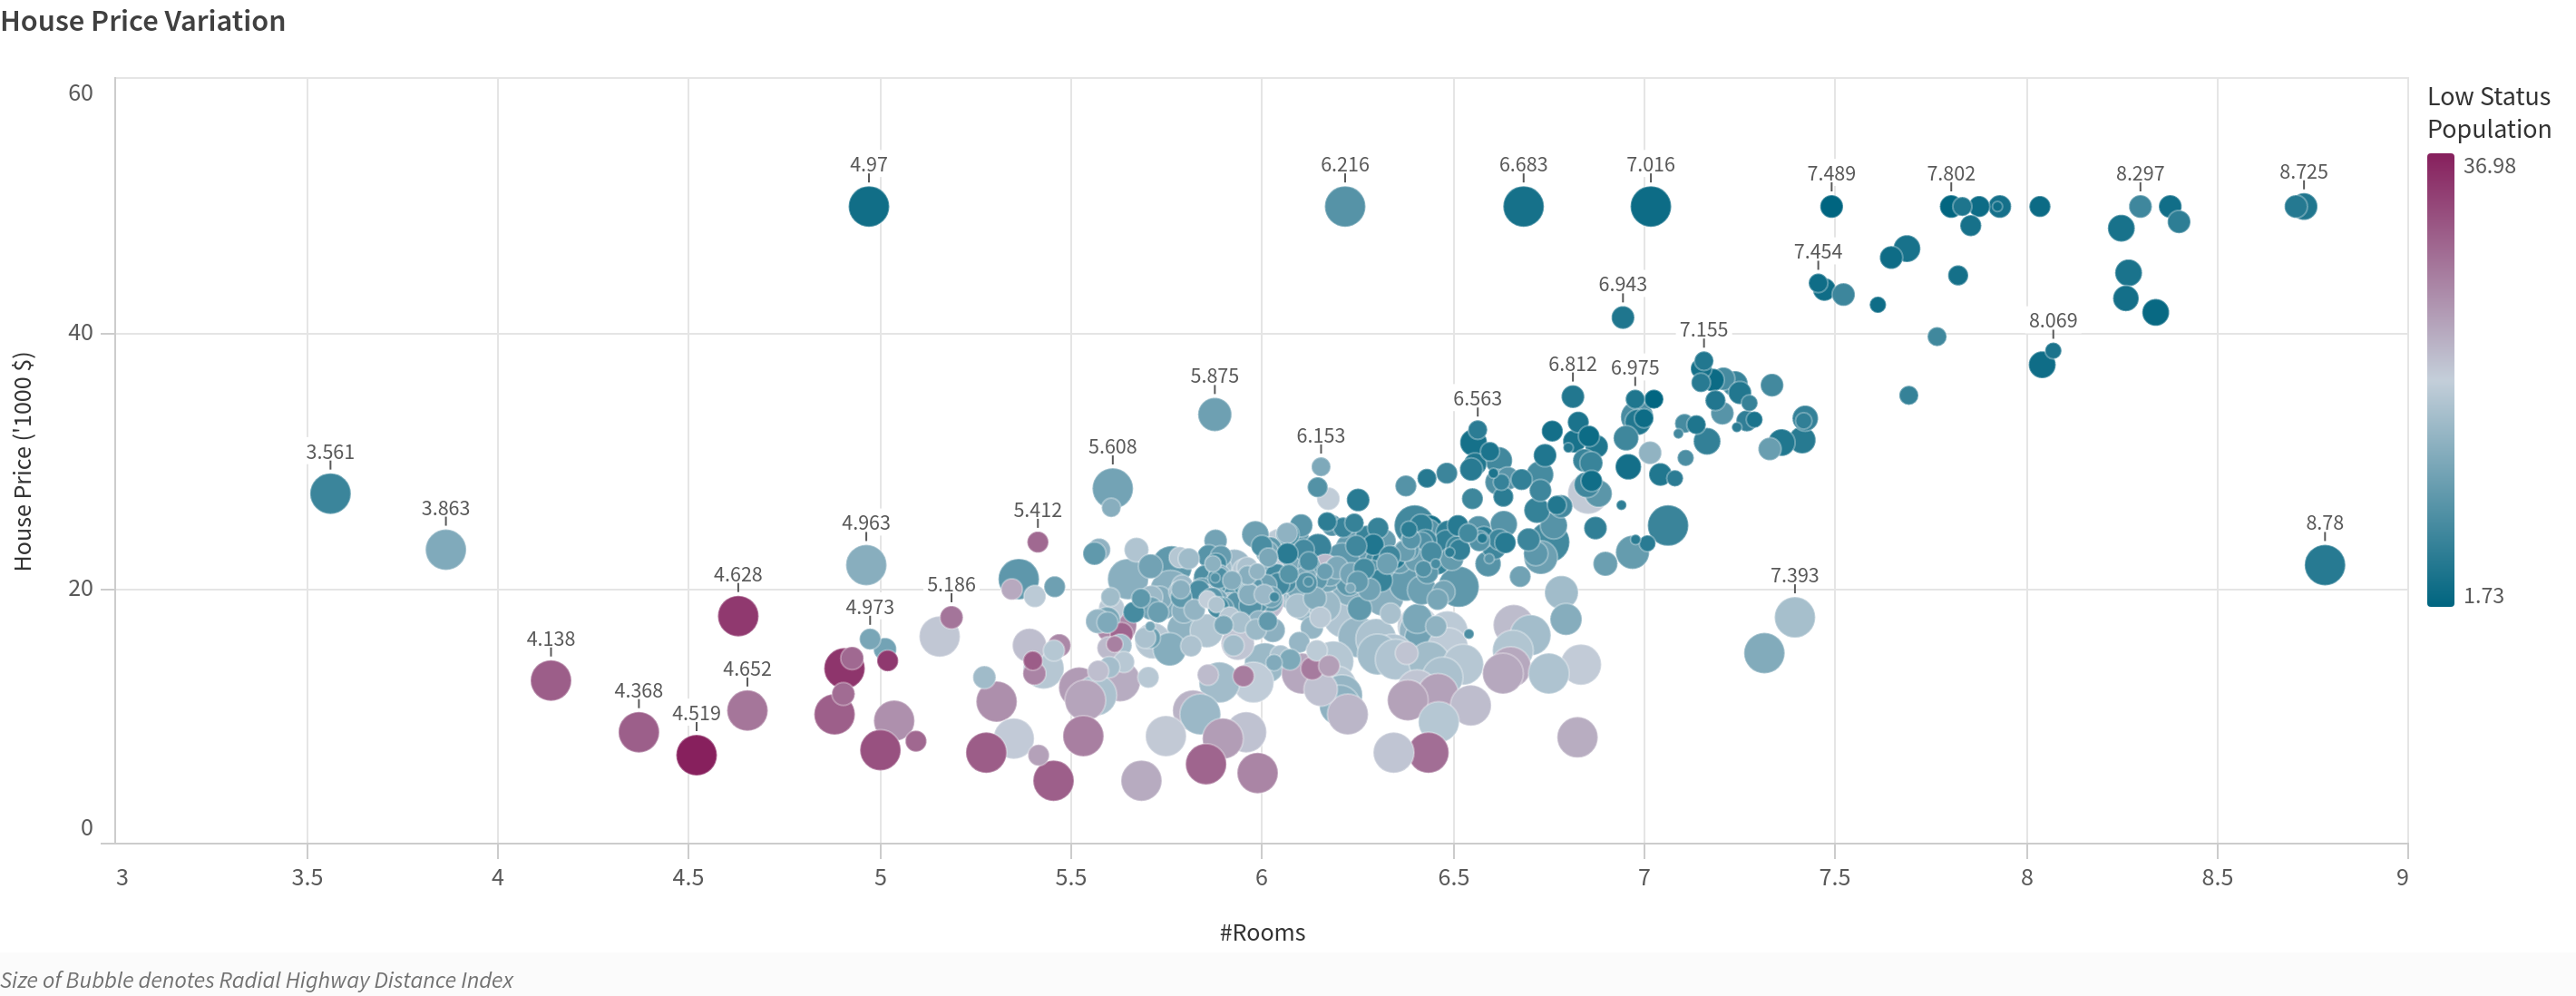

           target          RM
count  506.000000  506.000000
mean    22.532806    6.284634
std      9.197104    0.702617
min      5.000000    3.561000
25%     17.025000    5.885500
50%     21.200000    6.208500
75%     25.000000    6.623500
max     50.000000    8.780000
Distribution Plot 



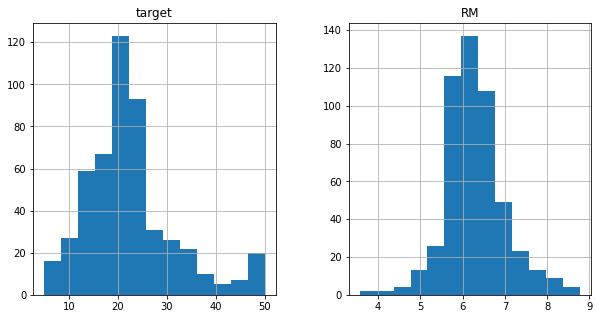

Correlation Score 

             RM   target
RM      1.00000  0.69536
target  0.69536  1.00000
Hypothesis Testing

Null hypothesis(H₀): There is no relationship between #rooms and house Price
Alternative hypothesis(H₁): There is a relationship between #rooms and house Price

Pearson's Correlation test to test the Hypothesis
stat value= -0.3769545650045963, P value = 1.5699822091877261e-18

Probably dependent as p value is lower than the threshold



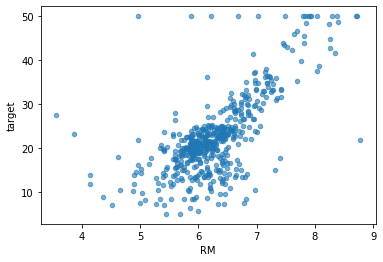

In [77]:
# please write your code below
print(df[['target','RM']].describe())
import matplotlib.pyplot as plt
#plot histogram to show distribution of each variable
print(f'Distribution Plot \n')
df[['target','RM']].hist(bins=13,figsize=(10,5))
plt.show()

#plot correlation of individual attribute
df.plot(kind="scatter",x="RM",y="target",alpha=0.6)

#correlation score between rooms and house price
print('Correlation Score \n')
print(df[['RM','target']].corr())

#Hypothesis
print('Hypothesis Testing\n')
print('Null hypothesis(H₀): There is no relationship between #rooms and house Price')
print('Alternative hypothesis(H₁): There is a relationship between #rooms and house Price\n')
#We then decide whether or not to reject the null hypothesis based on the p-value

print(f"Pearson's Correlation test to test the Hypothesis")
from scipy.stats import pearsonr
from sklearn import linear_model
data1 = df['AGE']
data2 = df['target']
stat, p = pearsonr(data1, data2)
print(f'stat value= {stat}, P value = {p}\n')
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent as p value is lower than the threshold\n')
 
#Exception Analysis - Outliers

#houses having low price for more rooms
df_low_price=df[(df['RM']>7) & (df['target']<25)]

#houses with high price for few rooms
df_high_price=df[(df['RM']<4.2) & (df['target']>20)]

#house having the highest price for average room numbers
df_very_hig_price=df[(df['RM']<7) & (df['target']>=50)]
#df[df['target']==50]

#PT ration RAD and TAX

## 2-2 The interaction effects 
Which attributes have the interaction effects? How does it affect the house price?

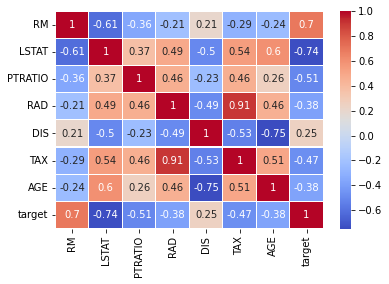

In [76]:
# please write your code below
import seaborn as sns
#plot correlation matrix
#['RM','LSTAT','PTRATIO','AGE','target']
corr_matrix=df[['RM','LSTAT','PTRATIO','RAD','DIS','TAX','AGE','target']].corr()
#corr_matrix.target.sort_values(ascending=False)
#This Correlation only measures linear relationship, non linear will go unnotices
#more atrributes needed - family income
#df.plot(kind="scatter",x="RM",y="target",alpha=0.6)
#df.plot(kind="scatter",x="LSTAT",y="target",alpha=0.6)
sns.heatmap(corr_matrix,linewidth=0.1,cmap = 'coolwarm',annot=True)

## Linear Correlation
strong +ve correlation scene with number of rooms, i.e House Price tends to go up as number of rooms increase but it caps at 50

The prices tend to decrease with an increase in LSTAT. Not a true linear relationship

